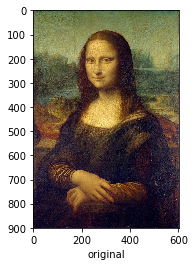

In [268]:
#(a) Load image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

img = plt.imread("/Users/yingzhu/Desktop/Mona_Lisa.jpg")
plt.imshow(img)
plt.xlabel("original")
plt.show()

In [269]:
#(b) Unifromly sample 5000 random (x,y) coordinate locations
sample_color = []
sample_loc =[]
sample_img = np.zeros([img.shape[0],img.shape[1],3], dtype=np.uint8)
sample_img.fill(255)     # set not chosen point to white
for i in range(5000):
    temp_sample1 = np.random.randint(img.shape[0])
    temp_sample2 = np.random.randint(img.shape[1])
    sample_img[temp_sample1][temp_sample2] = img[temp_sample1,temp_sample2]
    sample_loc.append([temp_sample1,temp_sample2])
    sample_color.append(img[temp_sample1,temp_sample2])

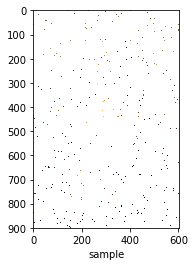

In [270]:
plt.imshow(sample_img)
plt.xlabel("sample")
plt.show()

In [271]:
# rescalling the pixel intensities to lie between 0.0 and 1.0
def rescal(img):
    rescaled_img = np.array(img, dtype=float)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rescaled_img[i][j] = img[i][j]/255
    return rescaled_img

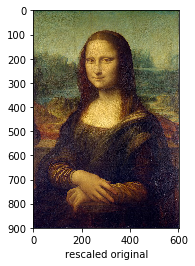

In [272]:
# rescal original image
img = rescal(img)
plt.imshow(img)
plt.xlabel("rescaled original")
plt.show()

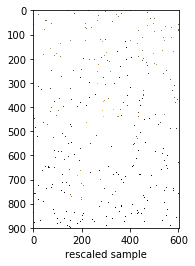

In [273]:
# rescal sample
sample_img = rescal(sample_img)
plt.imshow(sample_img)
plt.xlabel("rescaled sample")
plt.show()

In [274]:
# get scalled sample color
rescaled_sample_color =  np.array(sample_color, dtype=float)
rescaled_sample_color/=255

In [292]:
#1(d) build final image by regressing all three values at once
from sklearn.ensemble import RandomForestRegressor
def randomForest(depth,tree_num,train_point, train_color):
    RF = RandomForestRegressor(random_state = 0,n_estimators = tree_num, max_depth = depth)
    RF.fit(np.array(train_point),np.array(train_color))
    x_test = np.array([(x,y) for x in range(900) for y in range(604)])
    pred = RF.predict(x_test)
    return pred

In [337]:
# 1(e)(i) repeat the experiment for a random forest containing
# a single decision tree, but with depths 1,2,3,5,10
from pylab import *
def vary_depth(depth_list):
    plt.figure(figsize=[12, 12])
    plot_num=1
    for i in depth_list:
        temp_pred = randomForest(i,1,sample_loc,rescaled_sample_color)
        pred = temp_pred.reshape(900,604,3)
        plt.subplot(2, 3, plot_num)
        plt.title("prediction using "+ str(i) +" depth")
        plt.imshow(pred)
        plot_num+=1
    plt.show()
    return

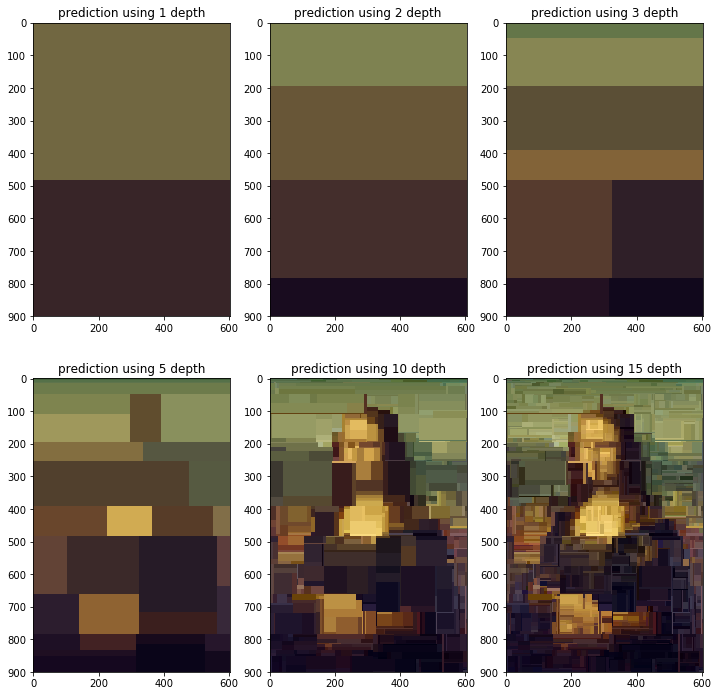

In [339]:
vary_depth([1,2,3,5,10,15])

In [ ]:
################################# Comment ###############################
# with the increase of the depth, the output graph becomes more accurate. Since with 
# more depth, we are allowed the graph be divided into more subspaces, which allow regressor more 
# accurately predict the result.

In [342]:
# 1(e)(ii) repeat the experiment for a random forest of depth 7
# but with number of tress equal to 1,3,5,10 and 100
def vary_tree(tree_list):
    plt.figure(figsize=[10, 10])
    plot_num=1
    for i in tree_list:
        temp_pred = randomForest(7,i,sample_loc,rescaled_sample_color)
        pred = temp_pred.reshape(900,604,3)
        plt.subplot(2, 3, plot_num)
        plt.xlabel("prediction using "+ str(i) +" tree")
        plt.imshow(pred)
        plot_num+=1
    plt.show()
    return

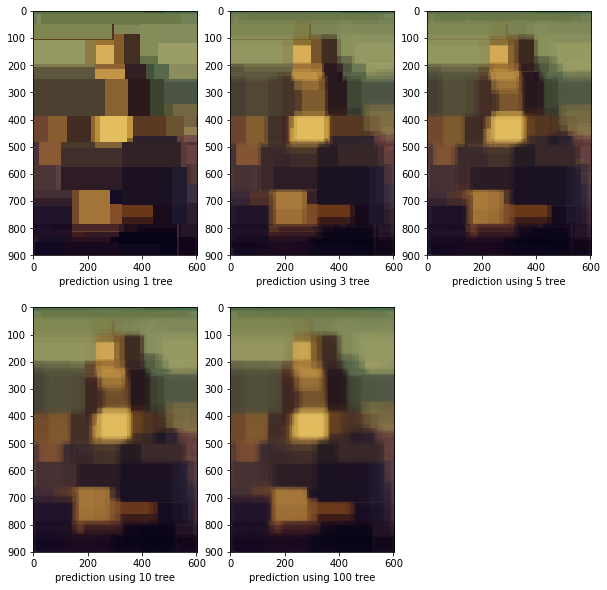

In [343]:
vary_tree([1,3,5,10,100])

In [ ]:
############################ Comment ################################################
#when we increase the number of trees in random forest,the output file becomes more and 
# more smooth. Since random forest is an ensembling method, for each tree we are using a subsample
# and part of the features, with the increase of the trees, we are able to decrease the variance of the result.
# But with number of trees large enough, we will face the problem of overfitting in random forest.

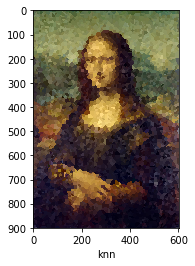

In [299]:
# KNN regressor for k =1
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(np.array(sample_loc),np.array(rescaled_sample_color))
x_test = np.array([(x,y) for x in range(900) for y in range(604)])
temp_pred = knn.predict(x_test)
pred = temp_pred.reshape(900,604,3)
plt.xlabel("knn")
plt.imshow(pred)
plt.show()

In [349]:
# differnt prunning strategies of your choice
# using differnt max feature
def randomForest1(depth,tree_num,type_chosen,train_point, train_color):
    RF = RandomForestRegressor(random_state = 0,n_estimators = tree_num, max_depth = depth,max_features = type_chosen)
    RF.fit(np.array(train_point),np.array(train_color))
    x_test = np.array([(x,y) for x in range(900) for y in range(604)])
    pred = RF.predict(x_test)
    return pred
def vary_max_feature(feature_list):
    plt.figure(figsize=[10, 10])
    plot_num=1
    for i in feature_list:
        temp_pred = randomForest1(15,3,i,sample_loc,rescaled_sample_color)
        pred = temp_pred.reshape(900,604,3)
        plt.subplot(2, 3, plot_num)
        plt.xlabel("prediction using "+ i)
        plt.imshow(pred)
        plot_num+=1
    plt.show()
    return

In [350]:
feature_list=['auto', 'sqrt', 'log2']

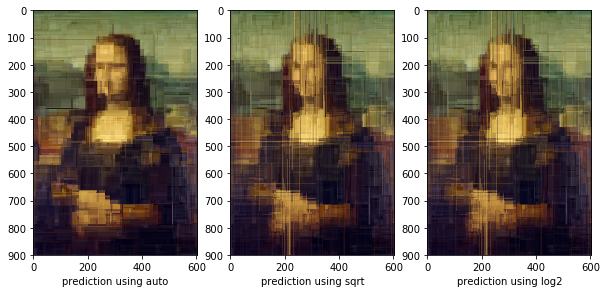

In [351]:
vary_max_feature(feature_list)

In [371]:
# using differnt min_samples_split
def randomForest2(depth,tree_num,min_split,train_point, train_color):
    RF = RandomForestRegressor(random_state = 0,n_estimators = tree_num, max_depth = depth,min_samples_split=min_split)
    RF.fit(np.array(train_point),np.array(train_color))
    x_test = np.array([(x,y) for x in range(900) for y in range(604)])
    pred = RF.predict(x_test)
    return pred
def vary_min_split(split_list):
    plt.figure(figsize=[12, 12])
    plot_num=1
    for i in split_list:
        temp_pred = randomForest2(15,3,i,sample_loc,rescaled_sample_color)
        pred = temp_pred.reshape(900,604,3)
        plt.subplot(2, 3, plot_num)
        plt.xlabel("prediction using min split of "+ str(i))
        plt.imshow(pred)
        plot_num+=1
    plt.show()
    return

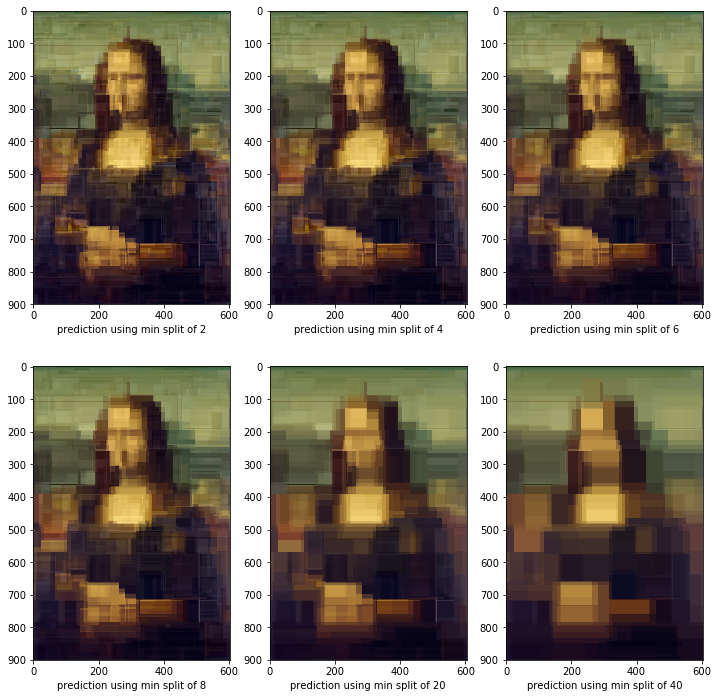

In [372]:
split_list = [2,4,6,8,20,40]
vary_min_split(split_list)

In [ ]:
# f(i)Since we only have feed the pixel coordination through the random forest, we
# will either split x or split y at each split point
# suppose we split x, then the decision rule will look like
#         if x>=t, left node
#         else,right node

In [ ]:
# f(ii) Since when we apply random forest, each leaf node we ended with is a rectangle with same assigment 
# of color.we could observe that random forest's output graph is a combination of colored segments
# But for knn, we assign each point's color according to the cloest point from it, the boundary will not be
# straight line as radnom forest

In [ ]:
# f(iii) Suppose the depth of the tree is l, then we will have at most 2^l patches of color

In [ ]:
# f(iv) if there is n decision trees, each will at most have 2^l patches of color where d is the depth
# There are at most n*2^d patches of color for n trees. There are chosen n from n*2^d different ways to choose n sub
# trees from n*2^d patches

In [14]:
# written exercise
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
x1 = [3,2,4,1,2,4,4]
x2 =[4,2,4,4,1,3,1]
color =['red','red','red','red','blue','blue','blue']

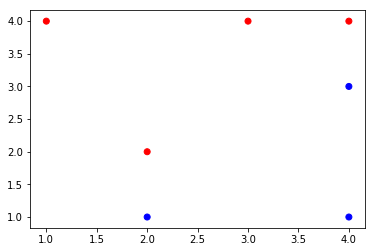

In [15]:
plt.scatter(x1,x2,c=color)
plt.show()